# Аналитика в авиакомпании

Заказчик — российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки.

Цель проекта - изучив базу данных и проанализировав спрос пассажиров на рейсы в различные города России, выяснить предпочтения пользователей, покупающих билеты на те или иные направления.

## Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
planes_on_flights = pd.read_csv('/Users/vintera/Git/projects/my_projects/dataset/project_05/query_1.csv')
planes_on_flights
planes_on_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


### Комментарий
В данной таблице содержится информация о 8-ми моделях самолетов и о количестве рейсов для каждой из них, совершенных в сентябре 2018 года. Типы данных соответствуют содержащейся в таблице информации.

In [3]:
flights_in_city = pd.read_csv('/Users/vintera/Git/projects/my_projects/dataset/project_05/query_3.csv')
flights_in_city
flights_in_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


### Вывод
В таблице содержится информация о городах в России и среднем количестве рейсов, прибывающих в них за день в августе 2018 года.  Типы данных соответствуют содержащейся в таблице информации.

## Исследовательский анализ данных (EDA)

In [4]:
# Выделяем в отдельную таблицу 10 городов с самым большим количеством принятых рейсов.
top_10_city = flights_in_city.sort_values(by='average_flights', ascending=False).head(10)
top_10_city

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Text(0, 0.5, 'Модель воздушного судна')

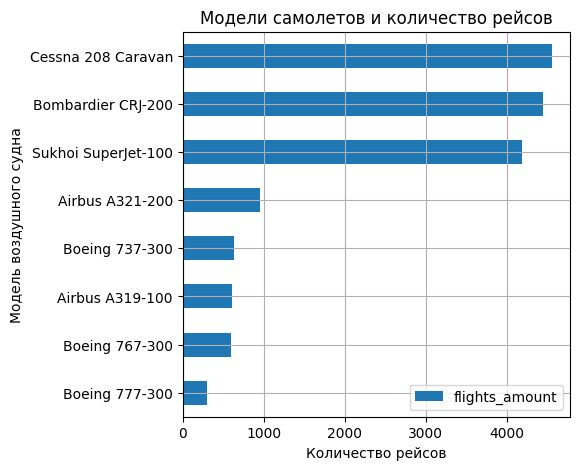

In [5]:
planes_on_flights.sort_values(
    by='flights_amount', ascending=True).plot.barh(
    x='model', y='flights_amount', grid = True, figsize = (5, 5))
plt.title('Модели самолетов и количество рейсов')
plt.xlabel('Количество рейсов')
plt.ylabel('Модель воздушного судна')

### Комментарий
Так как мы рассматриваем данные о внутренних авиаперевозках (пусть и в самой большой стране мира), абсолютным преимуществом пользуются ближнемагистральные, узкофюзеляжные модели самолетов, дальность полетов которых составляет от 1000 до 3000 км с пассажировместимостью до 100 человек:
1. Cessna 208 Caravan
2. Bombardier CRJ-200
3. Sukhoi SuperJet-100

Логично было бы предположить, что, затрачивая меньшее время на перелет, посадку и проверку пассажиров, погрузку и разгрузку багажа, перечисленные модели самолетов могут совершать большее количество рейсов, чем средне- и дальнемагистральные более пассажировместимые самолеты, что подтверждается показателями графика.

Text(0, 0.5, 'Город')

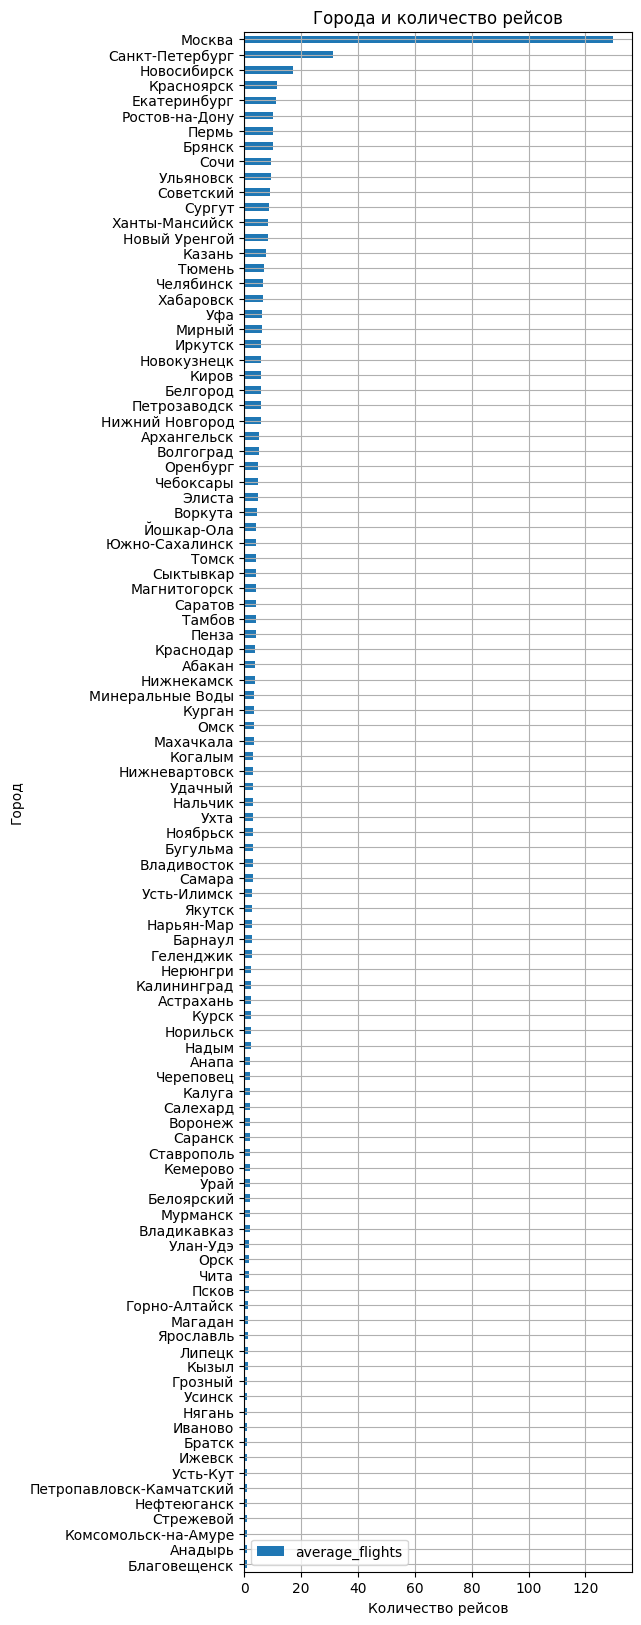

In [6]:
flights_in_city.sort_values(
    by='average_flights', ascending=True).plot.barh(
    x='city', y='average_flights', grid = True, figsize = (5, 20))
plt.title('Города и количество рейсов')
plt.xlabel('Количество рейсов')
plt.ylabel('Город')

### Комментарий
Как и можно было предположить, на Москву - абсолютного лидера по количеству рейсов, приходится почти четверть всех рейсов из представленной таблицы (23.4%). Большой ряд факторов влияет на количество рейсов в том или ином городе. Так как мы имеем очень небольшое количество информации, то о причинах распределения городов на графике можно только предполагать исходя из логики, личных знаний и опыта. Можно предположить, что главными факторами влияющими на количество рейсов являются:

1. Количество и качественные характеристики аэропортов
2. Количество внешних рейсов
3. Населенность города и развитость его инфраструктуры

Text(0, 0.5, 'Город')

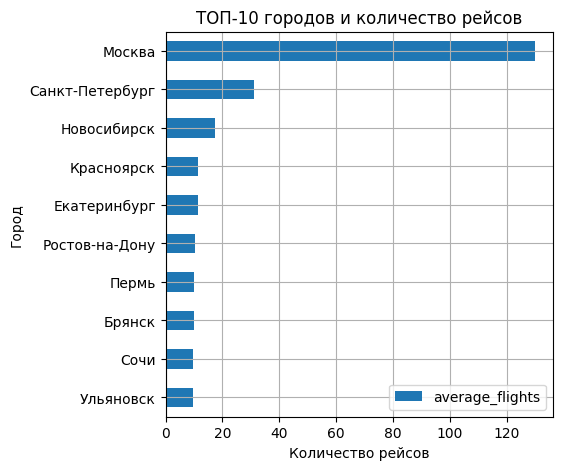

In [7]:
top_10_city.sort_values(
    by='average_flights', ascending=True).plot.barh(
    x='city', y='average_flights', grid = True, figsize = (5, 5))
plt.title('ТОП-10 городов и количество рейсов')
plt.xlabel('Количество рейсов')
plt.ylabel('Город')

### Вывод
Рассматривая более детально 10ку лидеров по количеству рейсов можно обратить внимание, что 7 городов из них являются городами - "миллионниками". Исключением здесь являются лишь Брянск, Сочи и Ульяновск. Без дополнительных данных можно только предположить, что рейсы в Брянск пользуются спросом из-за его близкого расположения к границам двух соседних государств. Так как мы брали данные за август 2018 года, попадание Сочи в выборку вполне объяснимо - курортный сезон там с легкостью продлится до конца сентября. Рейсы в Ульяновск возможно оправдываются наличием в области большого количества промышленных предприятий.

## Общий вывод и рекомендации бизнесу

В данном проекте у нас в наличии имелся очень скромный набор информации. Для более объемного анализа нам очень пригодились бы данные имеющиеся в свободном доступе в сети, такие как технические характеристики представленных моделей самолетов, характеристики аэропортов, а также данные о населении и инфраструктурах рассматриваемых городов.
Однако из имеющихся данных можно сделать следующие выводы:

1. Проведение фестивалей в городах практически не корррелирует с количеством рейсов (чего нельзя сказать о сезонности)
2. Лидерами по количеству рейсов являются небольшие модели самолетов, преодолевающие дистанции до 3000 км(что не говорит об их прибыльности перед более пассажировместимыми судами)
3. Города, лидирующие по количеству рейсов, в основном густонаселены, имеют не один аэропорт и инфраструктурно развиты.

